In [1]:
import numpy as np
import pandas as pd
import yfinance
import statsmodels.formula.api as smf
import statsmodels.api as smi
from table_making import summary_col
import matplotlib.pyplot as plt
import re

# Download VIX data

In [8]:
# vix = yfinance.download("^VIX", start="1990-01-01", end="2023-07-01")
# vix.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0


In [9]:
# vix.to_csv("data/VIX.csv")

# Load VIX and surface data

In [2]:
vix = pd.read_csv("data/VIX.csv")
vix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1,1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
2,1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
3,1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
4,1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0


In [3]:
vix = vix[["Date", "Close"]].rename(columns={"Date": "date", "Close": "VIX"})
vix.head()

,date,VIX
0,1990-01-02,17.240000
1,1990-01-03,18.190001
2,1990-01-04,19.219999
3,1990-01-05,20.110001
4,1990-01-08,20.260000


In [4]:
vix["delta_VIX"] = vix["VIX"] - vix["VIX"].shift(1)
vix["abs_delta_VIX"] = vix["delta_VIX"].abs()
vix.head()

,date,VIX,delta_VIX,abs_delta_VIX
0,1990-01-02,17.240000,NaN,NaN
1,1990-01-03,18.190001,0.950001,0.950001
2,1990-01-04,19.219999,1.029999,1.029999
3,1990-01-05,20.110001,0.890001,0.890001
4,1990-01-08,20.260000,0.150000,0.150000


In [5]:
spx_df = pd.read_parquet("data/spx_vol_surface_history_full_data_23.parquet").reset_index().rename(columns={"index": "date"})
spx_df.head()

,date,ttm_one_month_moneyness_pt_seven,ttm_one_month_moneyness_pt_eightfive,ttm_one_month_moneyness_pt_one,ttm_one_month_moneyness_pt_oneonefive,ttm_one_month_moneyness_pt_onethree,ttm_three_month_moneyness_pt_seven,ttm_three_month_moneyness_pt_eightfive,ttm_three_month_moneyness_pt_one,ttm_three_month_moneyness_pt_oneonefive,...,ttm_one_year_moneyness_pt_onethree,ttm_two_year_moneyness_pt_seven,ttm_two_year_moneyness_pt_eightfive,ttm_two_year_moneyness_pt_one,ttm_two_year_moneyness_pt_oneonefive,ttm_two_year_moneyness_pt_onethree,r_squared,mean_error,mean_absolute_error,observation
0,2000-01-03,6.194064e-02,0.312185,0.204530,0.130964,0.000000e+00,0.260440,0.275718,0.221527,0.168832,...,0.158510,0.266024,0.271155,0.228732,0.205318,0.190285,0.995027,-2.735137e-06,0.001119,114.0
1,2000-01-04,1.363700e-01,0.320018,0.240132,0.144813,5.976089e-17,0.416818,0.300325,0.230710,0.182980,...,0.174714,0.279396,0.281639,0.247485,0.215400,0.192983,0.997879,-1.101140e-06,0.001053,114.0
2,2000-01-05,9.418156e-18,0.342766,0.229619,0.144372,2.613037e-17,0.097694,0.295088,0.234404,0.188767,...,0.173313,0.299431,0.283072,0.246802,0.217927,0.199251,0.998235,-1.896156e-07,0.001036,110.0
3,2000-01-06,1.702120e-16,0.154186,0.186524,0.144133,0.000000e+00,0.038355,0.251156,0.235466,0.164924,...,0.165705,0.254652,0.274596,0.244797,0.213474,0.200466,0.980723,1.295322e-05,0.002518,107.0
4,2000-01-07,7.347157e-01,0.400736,0.205539,0.125236,4.878086e-17,0.393377,0.303629,0.220231,0.170690,...,0.165183,0.294667,0.268464,0.237584,0.212596,0.192267,0.999162,-4.525523e-07,0.001423,128.0


In [6]:
vix["date"] = vix["date"].astype("datetime64[D]")
spx_df2 = pd.merge(spx_df, vix, how="left", on=["date"])
spx_df2 = spx_df2.dropna()
spx_df2.head()

,date,ttm_one_month_moneyness_pt_seven,ttm_one_month_moneyness_pt_eightfive,ttm_one_month_moneyness_pt_one,ttm_one_month_moneyness_pt_oneonefive,ttm_one_month_moneyness_pt_onethree,ttm_three_month_moneyness_pt_seven,ttm_three_month_moneyness_pt_eightfive,ttm_three_month_moneyness_pt_one,ttm_three_month_moneyness_pt_oneonefive,...,ttm_two_year_moneyness_pt_one,ttm_two_year_moneyness_pt_oneonefive,ttm_two_year_moneyness_pt_onethree,r_squared,mean_error,mean_absolute_error,observation,VIX,delta_VIX,abs_delta_VIX
0,2000-01-03,6.194064e-02,0.312185,0.204530,0.130964,0.000000e+00,0.260440,0.275718,0.221527,0.168832,...,0.228732,0.205318,0.190285,0.995027,-2.735137e-06,0.001119,114.0,24.209999,-0.430000,0.430000
1,2000-01-04,1.363700e-01,0.320018,0.240132,0.144813,5.976089e-17,0.416818,0.300325,0.230710,0.182980,...,0.247485,0.215400,0.192983,0.997879,-1.101140e-06,0.001053,114.0,27.010000,2.800001,2.800001
2,2000-01-05,9.418156e-18,0.342766,0.229619,0.144372,2.613037e-17,0.097694,0.295088,0.234404,0.188767,...,0.246802,0.217927,0.199251,0.998235,-1.896156e-07,0.001036,110.0,26.410000,-0.600000,0.600000
3,2000-01-06,1.702120e-16,0.154186,0.186524,0.144133,0.000000e+00,0.038355,0.251156,0.235466,0.164924,...,0.244797,0.213474,0.200466,0.980723,1.295322e-05,0.002518,107.0,25.730000,-0.680000,0.680000
4,2000-01-07,7.347157e-01,0.400736,0.205539,0.125236,4.878086e-17,0.393377,0.303629,0.220231,0.170690,...,0.237584,0.212596,0.192267,0.999162,-4.525523e-07,0.001423,128.0,21.719999,-4.010000,4.010000


In [7]:
vix.to_csv("data/vix_processed.csv", index=False)

In [8]:
spx_df2.to_parquet("data/spx_with_vix.parquet", index=False)

# regression

In [2]:
def latex_format(sm):
    ltx = sm.as_latex()
    ltx = re.sub(r" +", " ", ltx)
    ltx = ltx.replace(" & VIX & abs\\_delta\\_VIX \\\\\n\\hline", """ & VIX & $|\\text{VIX}_t - \\text{VIX}_{t-1}|$ \\\\
 & (1) & (2) \\
\cmidrule(lr){2-2} \cmidrule(lr){3-3}""")
    ltx = ltx.replace("iv\_atm\_std", "std($\\text{iv}_{\\text{ATM}}$)")
    ltx = ltx.replace("R-squared Adj.", "\\hline\n$R^2$")
    ltx = ltx.replace("\\$N\\$", "$N$")
    ltx = ltx.replace("""lll""", """lcc""")
    ltx = ltx.replace("cc}\n\\hline", "cc}\n\\hline\\hline")
    ltx = ltx.replace("\\begin{table}\n\\caption{}\n\\label{}\n\\begin{center}\n", "")
    ltx = ltx.replace("\\end{center}\n\\end{table}", "")
    return ltx

In [3]:
spx_df = pd.read_parquet("data/spx_with_vix.parquet")

simulated_surfaces = np.load("test_spx/simpath/conv_mem_spx_ex3_0_gen3.npy") # no loss on ex_feats
simulated_atm = simulated_surfaces[:, :, 3, 2]
simulated_atm_std = np.std(simulated_atm, axis=1)

simulation2 = np.load("test_spx/simpath/ex3_model_0_gen3.npz") # loss on ret only
simulated_surfaces2 = simulation2["surfaces"]
simulated_atm2 = simulated_surfaces2[:, :, 3, 2]
simulated_atm_std2 = np.std(simulated_atm2, axis=1)

simulation3 = np.load("test_spx/simpath/conv_mem_spx_ex3_1_gen3.npz") # loss on every ex_features, ret, skew, slope
simulated_surfaces3 = simulation3["surfaces"]
simulated_atm3 = simulated_surfaces3[:, :, 3, 2]
simulated_atm_std3 = np.std(simulated_atm3, axis=1)

In [4]:
regression_df = spx_df.loc[4950:5050-1, ["date", "VIX", "delta_VIX", "abs_delta_VIX"]]
regression_df1 = regression_df.copy()
regression_df1["iv_atm_std"] = simulated_atm_std
regression_df2 = regression_df.copy()
regression_df2["iv_atm_std"] = simulated_atm_std2
regression_df3 = regression_df.copy()
regression_df3["iv_atm_std"] = simulated_atm_std3

In [5]:
models = []
for y in ["VIX", "abs_delta_VIX"]:
    model = smf.ols(f"{y}~1+iv_atm_std", data=regression_df1).fit(cov_type="HC3")
    models.append(model)

sm = summary_col(models, model_names=["VIX", "abs_delta_VIX"], stars=True,
                 regressor_order=["iv_atm_std", "Intercept"],
                 info_dict={'$N$':lambda x: "{0:d}".format(int(x.nobs))})
print(latex_format(sm))

\begin{tabular}{lcc}
\hline\hline
 & VIX & $|\text{VIX}_t - \text{VIX}_{t-1}|$ \\
\cmidrule(lr){2-2} \cmidrule(lr){3-3}
std($\text{iv}_{\text{ATM}}$) & 1199.8919*** & 103.4926 \\
 & (352.89) & (141.77) \\
Intercept & 7.2387*** & 0.1604 \\
 & (1.99) & (0.82) \\
\hline
$R^2$ & 0.140 & -0.002 \\
$N$ & 100 & 100 \\
\hline
\end{tabular}



In [6]:
models = []
for y in ["VIX", "abs_delta_VIX"]:
    model = smf.ols(f"{y}~1+iv_atm_std", data=regression_df2).fit(cov_type="HC3")
    models.append(model)

sm = summary_col(models, model_names=["VIX", "abs_delta_VIX"], stars=True,
                 regressor_order=["iv_atm_std", "Intercept"],
                 info_dict={'$N$':lambda x: "{0:d}".format(int(x.nobs))})
print(latex_format(sm))

\begin{tabular}{lcc}
\hline\hline
 & VIX & $|\text{VIX}_t - \text{VIX}_{t-1}|$ \\
\cmidrule(lr){2-2} \cmidrule(lr){3-3}
std($\text{iv}_{\text{ATM}}$) & 391.9824*** & 58.3018 \\
 & (120.97) & (56.76) \\
Intercept & 6.1065** & -0.4402 \\
 & (2.40) & (1.16) \\
\hline
$R^2$ & 0.069 & 0.003 \\
$N$ & 100 & 100 \\
\hline
\end{tabular}



In [7]:
models = []
for y in ["VIX", "abs_delta_VIX"]:
    model = smf.ols(f"{y}~1+iv_atm_std", data=regression_df3).fit(cov_type="HC3")
    models.append(model)

sm = summary_col(models, model_names=["VIX", "abs_delta_VIX"], stars=True,
                 regressor_order=["iv_atm_std", "Intercept"],
                 info_dict={'$N$':lambda x: "{0:d}".format(int(x.nobs))})
print(latex_format(sm))

\begin{tabular}{lcc}
\hline\hline
 & VIX & $|\text{VIX}_t - \text{VIX}_{t-1}|$ \\
\cmidrule(lr){2-2} \cmidrule(lr){3-3}
std($\text{iv}_{\text{ATM}}$) & 902.5929*** & 198.0545*** \\
 & (148.78) & (55.68) \\
Intercept & -18.8242*** & -6.4797*** \\
 & (5.36) & (2.01) \\
\hline
$R^2$ & 0.289 & 0.094 \\
$N$ & 100 & 100 \\
\hline
\end{tabular}



In [18]:
regression_df["date"]

4950   2019-09-06
4951   2019-09-09
4952   2019-09-10
4953   2019-09-11
4954   2019-09-12
          ...    
5045   2020-01-23
5046   2020-01-24
5047   2020-01-27
5048   2020-01-28
5049   2020-01-29
Name: date, Length: 100, dtype: datetime64[ns]

# Long timewindow

In [3]:
spx_df = pd.read_parquet("data/spx_with_vix.parquet")
spx_df["VIX"] = np.log(spx_df["VIX"])  # change this line to play with different linearization
for i in range(1, 11):
    spx_df[f"VIX_p{i}"] = spx_df["VIX"].shift(-i)
    spx_df[f"abs_delta_VIX_p{i}"] = np.abs(spx_df[f"VIX_p{i}"] - spx_df["VIX"].shift(1))
simulation = np.load("test_spx/simpath/gen_5300_1000_3.npz") # loss on ret
simulated_surfaces = simulation["surfaces"]
simulated_atm = simulated_surfaces[:, :, 3, 2]
simulated_atm_std = np.std(simulated_atm, axis=1)

regression_df = spx_df.loc[3:5303-1, 
["date", "VIX", "delta_VIX", "abs_delta_VIX"] + [f"VIX_p{i}" for i in range(1, 11)] + [f"abs_delta_VIX_p{i}" for i in range(1, 11)]]
regression_df1 = regression_df.copy()
regression_df1["iv_atm_std"] = np.log(simulated_atm_std)

In [4]:
regression_df1["date"]

3      2000-01-06
4      2000-01-07
5      2000-01-10
6      2000-01-11
7      2000-01-12
          ...    
5298   2021-01-27
5299   2021-01-28
5300   2021-01-29
5301   2021-02-01
5302   2021-02-02
Name: date, Length: 5300, dtype: datetime64[ns]

In [5]:
models = []
for y in ["VIX", "abs_delta_VIX"]:
    model = smf.ols(f"{y}~1+iv_atm_std", data=regression_df1).fit(cov_type="HC3")
    models.append(model)

sm = summary_col(models, model_names=["VIX", "abs_delta_VIX"], stars=True,
                 regressor_order=["iv_atm_std", "Intercept"],
                 info_dict={'$N$':lambda x: "{0:d}".format(int(x.nobs))})
print(latex_format(sm))

\begin{tabular}{lcc}
\hline\hline
 & VIX & $|\text{VIX}_t - \text{VIX}_{t-1}|$ \\
\cmidrule(lr){2-2} \cmidrule(lr){3-3}
std($\text{iv}_{\text{ATM}}$) & 1.0923*** & 1.5833*** \\
 & (0.02) & (0.08) \\
Intercept & 7.2257*** & 7.3148*** \\
 & (0.07) & (0.33) \\
\hline
$R^2$ & 0.323 & 0.044 \\
$N$ & 5300 & 5300 \\
\hline
\end{tabular}



In [6]:
sm

,VIX,abs_delta_VIX
iv_atm_std,1.0923***,1.5833***
,(0.02),(0.08)
Intercept,7.2257***,7.3148***
,(0.07),(0.33)
R-squared Adj.,0.323,0.044
$N$,5300,5300


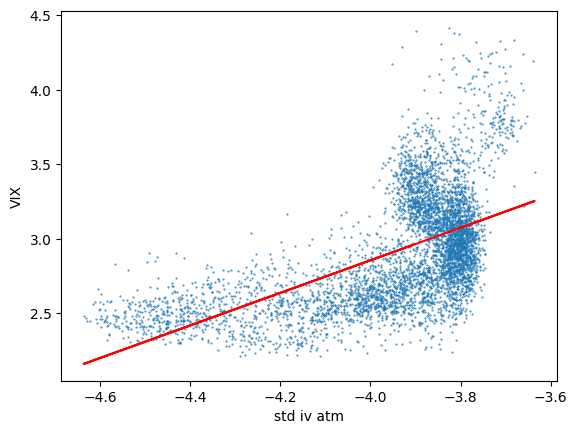

In [7]:
model = smf.ols(f"VIX~1+iv_atm_std", data=regression_df1).fit(cov_type="HC3")
y_pred = model.predict(regression_df1)
plt.plot(regression_df1["iv_atm_std"], y_pred, color="red")
plt.scatter(regression_df1["iv_atm_std"], regression_df1["VIX"], s=0.2)
plt.xlabel("std iv atm")
plt.ylabel("VIX")
plt.show()

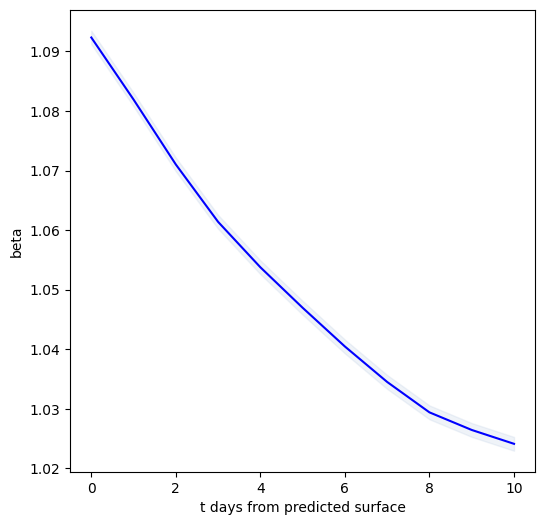

In [8]:
all_y = ["VIX"] + [f"VIX_p{i}" for i in range(1, 11)]
ts = []
betas = []
cins = [] # 95% low CI
cips = [] # 95% high CI
# pvs = [] # p values
for t, y in enumerate(all_y):
    model = smf.ols(f"{y}~1+iv_atm_std", data=regression_df1).fit(cov_type="HC3")
    ci = model.conf_int(alpha=0.95)
    ts.append(t)
    betas.append(model.params["iv_atm_std"])
    cins.append(ci.loc["iv_atm_std", 0])
    cips.append(ci.loc["iv_atm_std", 1])
    # pvs.append(model.pvalues["iv_atm_std"])

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.plot(ts, betas, color="blue", label="beta")
ax.fill_between(ts, cins, cips, color="lightsteelblue", alpha=0.2)
ax.set_xlabel("t days from predicted surface")
ax.set_ylabel("beta")
# ax_twin = ax.twinx()
# ax_twin.plot(ts, pvs, color="yellow", label="p-values")
# ax_twin.set_ylabel("p-value")
plt.show()

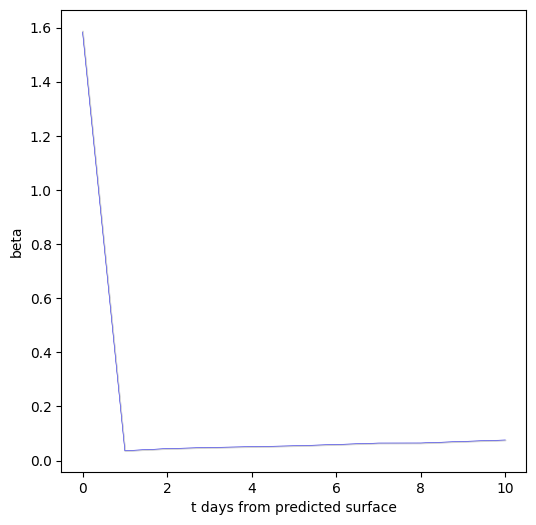

In [9]:
all_y = ["abs_delta_VIX"] + [f"abs_delta_VIX_p{i}" for i in range(1, 11)]
ts = []
betas = []
cins = [] # 95% low CI
cips = [] # 95% high CI
pvs = [] # p values
for t, y in enumerate(all_y):
    model = smf.ols(f"{y}~1+iv_atm_std", data=regression_df1).fit(cov_type="HC3")
    ci = model.conf_int(alpha=0.95)
    ts.append(t)
    betas.append(model.params["iv_atm_std"])
    cins.append(ci.loc["iv_atm_std", 0])
    cips.append(ci.loc["iv_atm_std", 1])
    # pvs.append(model.pvalues["iv_atm_std"])

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.plot(ts, betas, color="blue", label="beta", linewidth=0.3)
ax.fill_between(ts, cins, cips, color="gray", alpha=0.3)
ax.set_xlabel("t days from predicted surface")
ax.set_ylabel("beta")
# ax_twin = ax.twinx()
# ax_twin.plot(ts, pvs, color="yellow", label="p-values")
# ax_twin.set_ylabel("p-value")
plt.show()

In [16]:
spx_df.loc[:4000, "date"]

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
3996   2015-11-23
3997   2015-11-24
3998   2015-11-25
3999   2015-11-27
4000   2015-11-30
Name: date, Length: 4001, dtype: datetime64[ns]

In [17]:
spx_df.loc[4000:5000, "date"]

4000   2015-11-30
4001   2015-12-01
4002   2015-12-02
4003   2015-12-03
4004   2015-12-04
          ...    
4996   2019-11-13
4997   2019-11-14
4998   2019-11-15
4999   2019-11-18
5000   2019-11-19
Name: date, Length: 1001, dtype: datetime64[ns]

In [18]:
spx_df.loc[5000:, "date"]

5000   2019-11-19
5001   2019-11-20
5002   2019-11-21
5003   2019-11-22
5004   2019-11-25
          ...    
5817   2023-02-17
5818   2023-02-21
5819   2023-02-22
5820   2023-02-23
5821   2023-02-24
Name: date, Length: 822, dtype: datetime64[ns]

## with l2 loss

In [3]:
spx_df = pd.read_parquet("data/spx_with_vix.parquet")
# spx_df["VIX"] = -1 / spx_df["VIX"] # change this line to play with different linearization
for i in range(1, 11):
    spx_df[f"VIX_p{i}"] = spx_df["VIX"].shift(-i)
    spx_df[f"abs_delta_VIX_p{i}"] = np.abs(spx_df[f"VIX_p{i}"] - spx_df["VIX"].shift(1))
simulation = np.load("test_spx/simpath/gen_5300_1000_3_l2.npz") # loss on ret
simulated_surfaces = simulation["surfaces"]
simulated_atm = simulated_surfaces[:, :, 3, 2]
simulated_atm_std = np.std(simulated_atm, axis=1)

regression_df = spx_df.loc[3:5303-1, 
["date", "VIX", "delta_VIX", "abs_delta_VIX"] + [f"VIX_p{i}" for i in range(1, 11)] + [f"abs_delta_VIX_p{i}" for i in range(1, 11)]]
regression_df1 = regression_df.copy()
regression_df1["iv_atm_std"] = simulated_atm_std

In [4]:
models = []
for y in ["VIX", "abs_delta_VIX"]:
    model = smf.ols(f"{y}~1+iv_atm_std", data=regression_df1).fit(cov_type="HC3")
    models.append(model)

sm = summary_col(models, model_names=["VIX", "abs_delta_VIX"], stars=True,
                 regressor_order=["iv_atm_std", "Intercept"],
                 info_dict={'$N$':lambda x: "{0:d}".format(int(x.nobs))})
print(latex_format(sm))

\begin{tabular}{lcc}
\hline\hline
 & VIX & $|\text{VIX}_t - \text{VIX}_{t-1}|$ \\
 & (1) & (2) \
\cmidrule(lr){2-2} \cmidrule(lr){3-3}
std($\text{iv}_{\text{ATM}}$) & 3750.7636*** & 264.1585*** \\
 & (63.54) & (18.40) \\
Intercept & -2.7982*** & -0.5345*** \\
 & (0.35) & (0.10) \\
\hline
$R^2$ & 0.760 & 0.138 \\
$N$ & 5300 & 5300 \\
\hline
\end{tabular}



In [5]:
sm

,VIX,abs_delta_VIX
iv_atm_std,3750.7636***,264.1585***
,(63.54),(18.40)
Intercept,-2.7982***,-0.5345***
,(0.35),(0.10)
R-squared Adj.,0.760,0.138
$N$,5300,5300


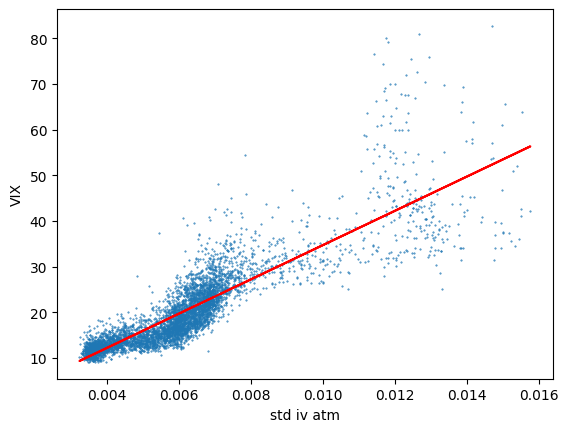

In [6]:
model = smf.ols(f"VIX~1+iv_atm_std", data=regression_df1).fit(cov_type="HC3")
y_pred = model.predict(regression_df1)
plt.plot(regression_df1["iv_atm_std"], y_pred, color="red")
plt.scatter(regression_df1["iv_atm_std"], regression_df1["VIX"], s=0.2)
plt.xlabel("std iv atm")
plt.ylabel("VIX")
plt.show()

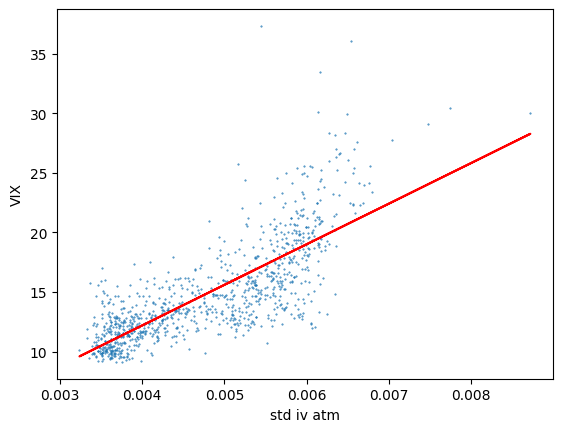

In [7]:
model = smf.ols(f"VIX~1+iv_atm_std", data=regression_df1[4000-3:5000-3]).fit(cov_type="HC3")
y_pred = model.predict(regression_df1[4000-3:5000-3])
plt.plot(regression_df1[4000-3:5000-3]["iv_atm_std"], y_pred, color="red")
plt.scatter(regression_df1[4000-3:5000-3]["iv_atm_std"], regression_df1[4000-3:5000-3]["VIX"], s=0.2)
plt.xlabel("std iv atm")
plt.ylabel("VIX")
plt.show()

In [11]:
sm = summary_col([model], model_names=["VIX"], stars=True,
                 regressor_order=["iv_atm_std", "Intercept"],
                 info_dict={'$N$':lambda x: "{0:d}".format(int(x.nobs))})
print(latex_format(sm))

\begin{tabular}{ll}
\hline
 & VIX \\
\hline
std($\text{iv}_{\text{ATM}}$) & 3404.8486*** \\
 & (101.76) \\
Intercept & -1.4193*** \\
 & (0.44) \\
\hline
$R^2$ & 0.607 \\
$N$ & 1000 \\
\hline
\end{tabular}



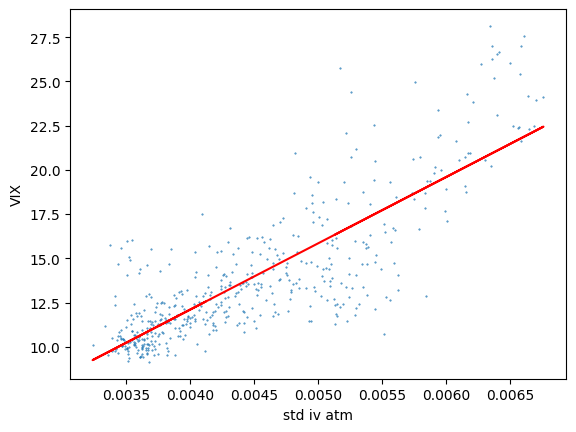

In [12]:
model = smf.ols(f"VIX~1+iv_atm_std", data=regression_df1[4000-3:4500-3]).fit(cov_type="HC3")
y_pred = model.predict(regression_df1[4000-3:4500-3])
plt.plot(regression_df1[4000-3:4500-3]["iv_atm_std"], y_pred, color="red")
plt.scatter(regression_df1[4000-3:4500-3]["iv_atm_std"], regression_df1[4000-3:4500-3]["VIX"], s=0.2)
plt.xlabel("std iv atm")
plt.ylabel("VIX")
plt.show()

In [13]:
sm = summary_col([model], model_names=["VIX"], stars=True,
                 regressor_order=["iv_atm_std", "Intercept"],
                 info_dict={'$N$':lambda x: "{0:d}".format(int(x.nobs))})
print(latex_format(sm))

\begin{tabular}{ll}
\hline
 & VIX \\
\hline
std($\text{iv}_{\text{ATM}}$) & 3750.0208*** \\
 & (146.10) \\
Intercept & -2.8988*** \\
 & (0.61) \\
\hline
$R^2$ & 0.680 \\
$N$ & 500 \\
\hline
\end{tabular}



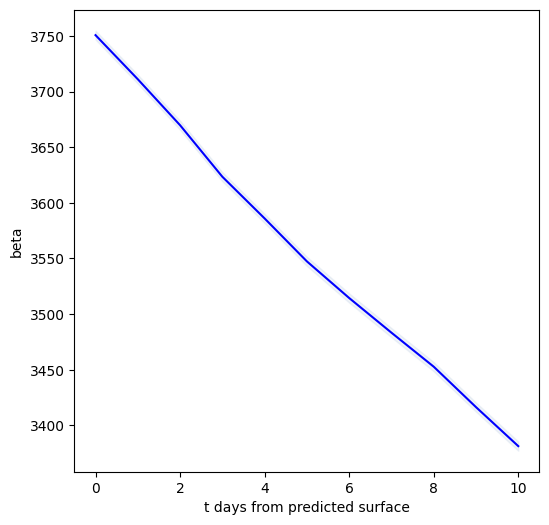

In [13]:
all_y = ["VIX"] + [f"VIX_p{i}" for i in range(1, 11)]
ts = []
betas = []
cins = [] # 95% low CI
cips = [] # 95% high CI
# pvs = [] # p values
for t, y in enumerate(all_y):
    model = smf.ols(f"{y}~1+iv_atm_std", data=regression_df1).fit(cov_type="HC3")
    ci = model.conf_int(alpha=0.95)
    ts.append(t)
    betas.append(model.params["iv_atm_std"])
    cins.append(ci.loc["iv_atm_std", 0])
    cips.append(ci.loc["iv_atm_std", 1])
    # pvs.append(model.pvalues["iv_atm_std"])

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.plot(ts, betas, color="blue", label="beta")
ax.fill_between(ts, cins, cips, color="lightsteelblue", alpha=0.2)
ax.set_xlabel("t days from predicted surface")
ax.set_ylabel("beta")
# ax_twin = ax.twinx()
# ax_twin.plot(ts, pvs, color="yellow", label="p-values")
# ax_twin.set_ylabel("p-value")
plt.show()

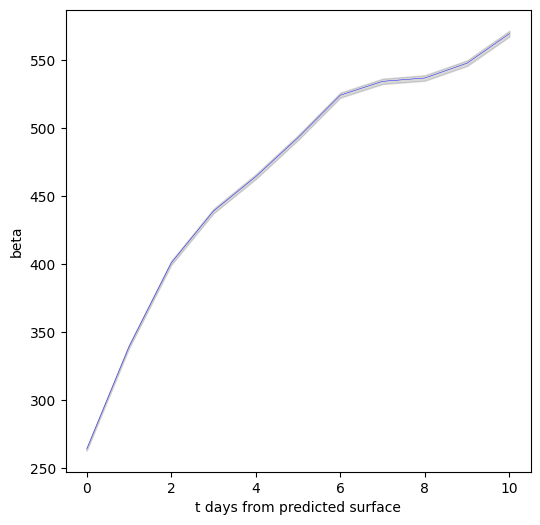

In [14]:
all_y = ["abs_delta_VIX"] + [f"abs_delta_VIX_p{i}" for i in range(1, 11)]
ts = []
betas = []
cins = [] # 95% low CI
cips = [] # 95% high CI
pvs = [] # p values
for t, y in enumerate(all_y):
    model = smf.ols(f"{y}~1+iv_atm_std", data=regression_df1).fit(cov_type="HC3")
    ci = model.conf_int(alpha=0.95)
    ts.append(t)
    betas.append(model.params["iv_atm_std"])
    cins.append(ci.loc["iv_atm_std", 0])
    cips.append(ci.loc["iv_atm_std", 1])
    # pvs.append(model.pvalues["iv_atm_std"])

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.plot(ts, betas, color="blue", label="beta", linewidth=0.3)
ax.fill_between(ts, cins, cips, color="gray", alpha=0.3)
ax.set_xlabel("t days from predicted surface")
ax.set_ylabel("beta")
# ax_twin = ax.twinx()
# ax_twin.plot(ts, pvs, color="yellow", label="p-values")
# ax_twin.set_ylabel("p-value")
plt.show()